In [1]:
from JHProgress import JHProgress
from JHProgress_tsf import TSF
from JHProgress_portopt import PortOPT
import pandas as pd
import numpy as np
import yaml
import warnings
warnings.filterwarnings("ignore")

c:\Users\palaj\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("config.yaml","r") as f:
    config = yaml.safe_load(f)

# Obtencion de datos

In [3]:
#jhp=JHProgress()
#jhp.cargar_fundamentales()","#Scrapping","de","la","SEC
#jhp.guardar_fundamentales_sql()","#Guardar","en","SQL
#prices=jhp.descargar_precios_yahoo(config['Tiempo']['Inicio']","config['Tiempo']['Fin'])
#fundamentales=jhp.cargar_fundamentales_sql()
#jhp.guardar_precios_fundamentales_sql()

# Forecasting

In [4]:
tsf=TSF()
#tsf.entrenar_modelos()
#tsf.hyper_tunning('NVDA')

#result_df=pd.DataFrame()
#for sym in config['Simbolos']:
#    df=tsf.inferencia(sym)
#    result_df=pd.concat([df,result_df])

#tsf.guardar_sql(result_df,'TablaPredicciones')

2025-12-13 11:01:22,470 - INFO - Tickers downloaded successfully
2025-12-13 11:01:24,152 - INFO - DataFrame desde la tabla VW_FUNDAMENTALES_ESTACIONARIOS cargado exitosamente
2025-12-13 11:01:25,847 - INFO - DataFrame desde la tabla VW_LINEAR_FUNDAMENTALES cargado exitosamente


In [5]:
tsf.table_fundamentals_linear

,WeightedAverageNumberOfDilutedSharesOutstanding,ROE,ROA,AssetTurnover,DebtToEquity,NetProfitMargin,OperatingMargin,EarningsPerShareDiluted,GrossProfit,NetIncomeLoss,...,SalesPerShare,EarningsPerShareDilutedTTM,Date,PE_Ratio,PB_Ratio,PS_Ratio,MarketCap,Price,Simbolo,CostsAndExpenses
0,1.374979,0.143118,0.049325,NaN,1.901547,NaN,NaN,0.53131,0.701516,0.73054,...,NaN,0.325413,2018-01-02,16.694327,5.936558,NaN,0.195935,40.341888,AAPL,NaN
1,1.374979,0.143118,0.049325,NaN,1.901547,NaN,NaN,0.53131,0.701516,0.73054,...,NaN,0.325413,2018-01-03,16.691416,5.935523,NaN,0.195901,40.334854,AAPL,NaN
2,1.374979,0.143118,0.049325,NaN,1.901547,NaN,NaN,0.53131,0.701516,0.73054,...,NaN,0.325413,2018-01-04,16.768951,5.963094,NaN,0.196811,40.522217,AAPL,NaN
3,1.374979,0.143118,0.049325,NaN,1.901547,NaN,NaN,0.53131,0.701516,0.73054,...,NaN,0.325413,2018-01-05,16.959870,6.030986,NaN,0.199052,40.983574,AAPL,NaN
4,1.374979,0.143118,0.049325,NaN,1.901547,NaN,NaN,0.53131,0.701516,0.73054,...,NaN,0.325413,2018-01-08,16.896877,6.008585,NaN,0.198312,40.831352,AAPL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20929,NaN,0.134269,0.051091,NaN,1.628057,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,2025-12-02,NaN,NaN,NaN,NaN,329.619995,V,1.0
20930,NaN,0.134269,0.051091,NaN,1.628057,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,2025-12-03,NaN,NaN,NaN,NaN,329.609985,V,1.0
20931,NaN,0.134269,0.051091,NaN,1.628057,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,2025-12-04,NaN,NaN,NaN,NaN,327.100006,V,1.0
20932,NaN,0.134269,0.051091,NaN,1.628057,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,2025-12-05,NaN,NaN,NaN,NaN,331.239990,V,1.0


# Ajuste de portafolio

2025-12-12 21:06:53,708 - INFO - Tickers downloaded successfully
2025-12-12 21:06:56,902 - INFO - DataFrame desde la tabla VW_FORECAST cargado exitosamente
2025-12-12 21:07:20,483 - INFO - DataFrame de precios descargado exitosamente
2025-12-12 21:07:23,436 - INFO - DataFrame de retornos logarítmicos calculado exitosamente


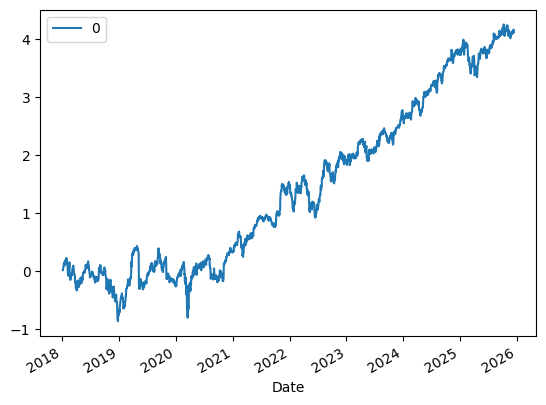

In [22]:
popt=PortOPT()
popt.visualizar_historico()
popt.w.loc['NVDA',0]=6.898805e-01
popt.w.loc['CPRX',0]=1.588903e-01

In [23]:
ports=popt.simulacion_montecarlo(100).cumsum()

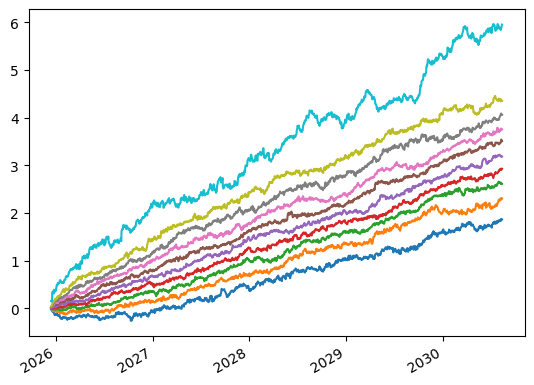

In [30]:
for i in range(1,11):
    ports.quantile(i/10,axis=1).plot(subplots=False)

In [31]:
popt.w

,0
Simbolo,
AAPL,4.118133e-12
ANET,8.759073e-01
CORT,2.753221e-01
CPRX,1.588903e-01
NVDA,6.898805e-01
PGR,5.825588e-12
TPL,1.323183e-12
UNH,8.174020e-13
USLM,8.449111e-13
